In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

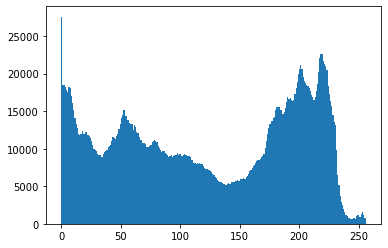

In [47]:


img =cv2.imread("Tennis.jpg")
roi = img[ 250: 465, 342: 565]
x = 342
y = 250
width = 233
height = 215
hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi],[0],None,[180],[0,180])
cv2.imshow("ball", hsv_roi)
plt.hist(img.ravel(),256,[0,256])
plt.show()


cap = cv2.VideoCapture(0)

term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)
while True:
    _,frame = cap.read()
    blurred_frame = cv2.GaussianBlur(frame,(5,5),0)
    hsv = cv2.cvtColor(blurred_frame,cv2.COLOR_BGR2HSV)
    
    #change the lower_blue and upper_blue according to the light
    lower_green = np.array([35,35,35])
    upper_green = np.array([90,255,255])
    mask = cv2.inRange(hsv,lower_green,upper_green)
    ret, track_Window = cv2.CamShift(mask, (x,y,width,height), term_criteria)
    pts = cv2.boxPoints(ret)
    pts = np.int0(pts)
    cv2.polylines(frame,[pts], True, (255,0,0),2)
    
    contours,hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    


    for contour in contours:
        (x,y,w,h) = cv2.boundingRect(contour)
        
        
        area = cv2.contourArea(contour)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),3)
        cv2.putText(frame, str(area), (x,y),0,1,(255,255,0))
        cv2.imshow('Mask',mask)
        #use it later as it's getting struck
        #cv2.putText(frame, str(contours),(x+w,y+h),1,2,(255,255,0))
        
    
       # print('Area' ,area)
        
        
    cv2.drawContours(frame,contours,-1,(0,255,0),3)
    cv2.imshow("Frame",frame)
    cv2.imshow("Mask",mask)

    
    
    key = cv2.waitKey(1)
    
    if key == 27:
        break
        
cap.release()
cv2.destroyAllWindows()